In [45]:
import os
import re
import warnings

import matplotlib.pyplot as plt
import pandas as pd

import knn
import common

figure_folder = os.path.abspath(common.get_figure_folder())
!mkdir -p $figure_folder
figure_folder

'/home/olga/code/kmer-hashing/figures/084_analyze_similarities_cell_subset'

In [15]:
import xarray as xr

folder = "/data_lg/olga/maca/facs/sourmash_compute_tissue_subset/xarray/"
basename = "similarities_ksizes=21,27_molecules=DNA,protein_log2numhashes=8,9,10.netcdf"

filename = f"{folder}/{basename}"

ds = xr.open_dataset(filename)
ds

<xarray.Dataset>
Dimensions:                                   (cell1: 1000, cell2: 1000)
Coordinates:
  * cell1                                     (cell1) object 'A1-B002764-3_38_F-1-1' ... 'P9-MAA000487-3_10_M-1-1'
  * cell2                                     (cell2) object 'A1-B002764-3_38_F-1-1' ... 'P9-MAA000487-3_10_M-1-1'
Data variables:
    molecule=DNA_ksize=21_log2numhash=8       (cell1, cell2) float64 ...
    molecule=DNA_ksize=27_log2numhash=8       (cell1, cell2) float64 ...
    molecule=protein_ksize=21_log2numhash=8   (cell1, cell2) float64 ...
    molecule=protein_ksize=27_log2numhash=8   (cell1, cell2) float64 ...
    molecule=DNA_ksize=21_log2numhash=9       (cell1, cell2) float64 ...
    molecule=DNA_ksize=27_log2numhash=9       (cell1, cell2) float64 ...
    molecule=protein_ksize=21_log2numhash=9   (cell1, cell2) float64 ...
    molecule=protein_ksize=27_log2numhash=9   (cell1, cell2) float64 ...
    molecule=DNA_ksize=21_log2numhash=10      (cell1, cell2) float6

In [16]:
annotations = pd.read_csv('/home/olga/code/tabula-muris/00_data_ingest/18_global_annotation_csv/annotations_facs.csv')
annotations.cell = annotations.cell.str.replace('.', '-')
annotations = annotations.set_index('cell')
print(annotations.shape)
annotations.head()

(44949, 23)


/home/olga/.conda/envs/kmer-hashing/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Neurog3>0_raw,Neurog3>0_scaled,cell_ontology_class,cell_ontology_id,cluster.ids,free_annotation,mouse.id,mouse.sex,plate.barcode,subsetA,...,subsetC,subsetC_cluster.ids,subsetD,subsetD_cluster.ids,subsetE,subsetE_cluster.ids,subtissue,tissue,tissue_tSNE_1,tissue_tSNE_2
cell,,,,,,,,,,,,,,,,,,,,,
A1-B000610-3_56_F-1-1,NaN,NaN,bladder cell,CL:1001319,5,Bladder mesenchymal cell,3_56_F,F,B000610,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bladder,-7.182841,-10.895094
A1-B002764-3_38_F-1-1,NaN,NaN,bladder urothelial cell,CL:1001428,3,Luminal bladder epithelial cell,3_38_F,F,B002764,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bladder,4.199059,-11.050240
A1-B002771-3_39_F-1-1,NaN,NaN,bladder cell,CL:1001319,5,Bladder mesenchymal cell,3_39_F,F,B002771,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bladder,-11.995435,-7.325534
A1-D041914-3_8_M-1-1,NaN,NaN,bladder cell,CL:1001319,5,Bladder mesenchymal cell,3_8_M,M,D041914,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bladder,-6.820022,-14.174246
A1-D042253-3_9_M-1-1,NaN,NaN,bladder cell,CL:1001319,2,Bladder mesenchymal cell,3_9_M,M,D042253,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bladder,-24.163538,-7.499349


In [17]:
for x in ds.items():
    print(x)

('molecule=DNA_ksize=21_log2numhash=8', <xarray.DataArray 'molecule=DNA_ksize=21_log2numhash=8' (cell1: 1000, cell2: 1000)>
[1000000 values with dtype=float64]
Coordinates:
  * cell1    (cell1) object 'A1-B002764-3_38_F-1-1' ... 'P9-MAA000487-3_10_M-1-1'
  * cell2    (cell2) object 'A1-B002764-3_38_F-1-1' ... 'P9-MAA000487-3_10_M-1-1')
('molecule=DNA_ksize=27_log2numhash=8', <xarray.DataArray 'molecule=DNA_ksize=27_log2numhash=8' (cell1: 1000, cell2: 1000)>
[1000000 values with dtype=float64]
Coordinates:
  * cell1    (cell1) object 'A1-B002764-3_38_F-1-1' ... 'P9-MAA000487-3_10_M-1-1'
  * cell2    (cell2) object 'A1-B002764-3_38_F-1-1' ... 'P9-MAA000487-3_10_M-1-1')
('molecule=protein_ksize=21_log2numhash=8', <xarray.DataArray 'molecule=protein_ksize=21_log2numhash=8' (cell1: 1000, cell2: 1000)>
[1000000 values with dtype=float64]
Coordinates:
  * cell1    (cell1) object 'A1-B002764-3_38_F-1-1' ... 'P9-MAA000487-3_10_M-1-1'
  * cell2    (cell2) object 'A1-B002764-3_38_F-1-1' ... 'P9-M

In [22]:
da = ds['molecule=protein_ksize=21_log2numhash=10']
da

<xarray.DataArray 'molecule=protein_ksize=21_log2numhash=10' (cell1: 1000, cell2: 1000)>
[1000000 values with dtype=float64]
Coordinates:
  * cell1    (cell1) object 'A1-B002764-3_38_F-1-1' ... 'P9-MAA000487-3_10_M-1-1'
  * cell2    (cell2) object 'A1-B002764-3_38_F-1-1' ... 'P9-MAA000487-3_10_M-1-1'

In [25]:
da.cell1

<xarray.DataArray 'cell1' (cell1: 1000)>
array(['A1-B002764-3_38_F-1-1', 'A1-D042253-3_9_M-1-1',
       'A1-MAA000487-3_10_M-1-1', ..., 'P8-MAA000907-3_11_M-1-1',
       'P9-B001717-3_38_F-1-1', 'P9-MAA000487-3_10_M-1-1'], dtype=object)
Coordinates:
  * cell1    (cell1) object 'A1-B002764-3_38_F-1-1' ... 'P9-MAA000487-3_10_M-1-1'

In [27]:
annotations.loc[da.cell1].shape

(1000, 23)

In [30]:
da.values

array([[0.        , 0.01171875, 0.01953125, ..., 0.015625  , 0.04296875,
        0.0078125 ],
       [0.01171875, 0.        , 0.078125  , ..., 0.03125   , 0.0078125 ,
        0.0625    ],
       [0.01953125, 0.078125  , 0.        , ..., 0.02734375, 0.015625  ,
        0.0703125 ],
       ...,
       [0.015625  , 0.03125   , 0.02734375, ..., 0.        , 0.01171875,
        0.02734375],
       [0.04296875, 0.0078125 , 0.015625  , ..., 0.01171875, 0.        ,
        0.0234375 ],
       [0.0078125 , 0.0625    , 0.0703125 , ..., 0.02734375, 0.0234375 ,
        0.        ]])

In [35]:
name

'molecule=DNA_ksize=21_log2numhash=8'

In [40]:
pattern = '([a-z2]+)=([a-z0-9A-Z]+)'

attributes = dict(re.findall(pattern, name))
attributes

{'molecule': 'DNA', 'ksize': '21', 'log2numhash': '8'}

In [51]:
knn.draw_graph??

In [54]:
import networkx as nx

In [58]:
nx.draw_networkx?

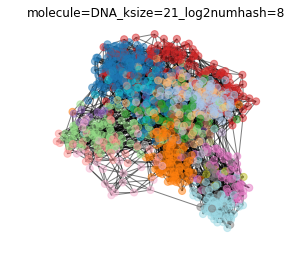

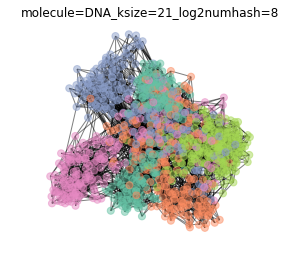

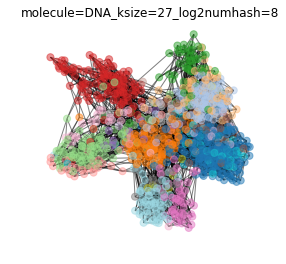

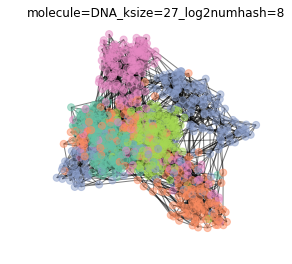

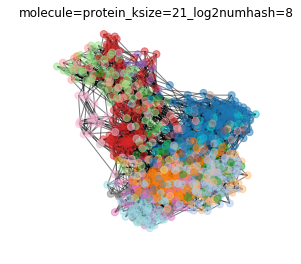

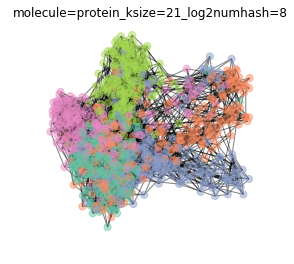

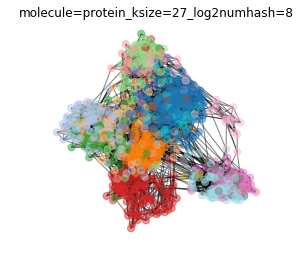

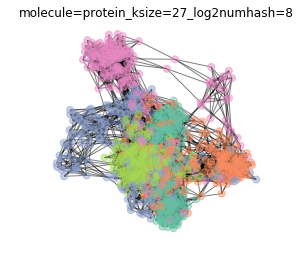

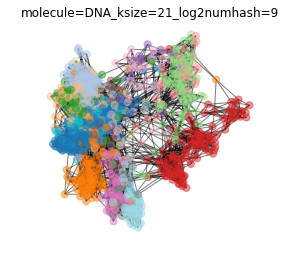

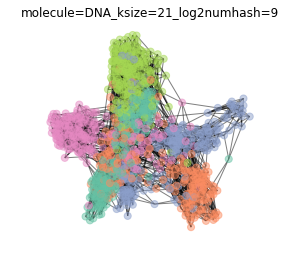

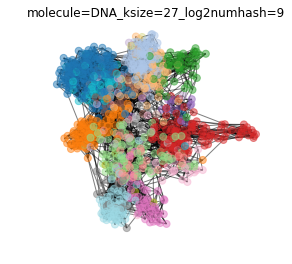

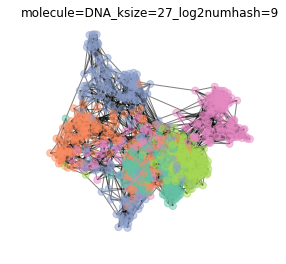

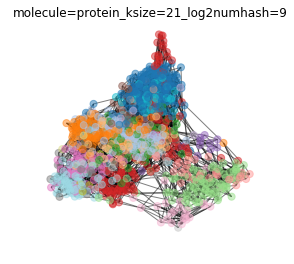

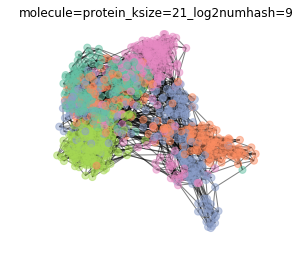

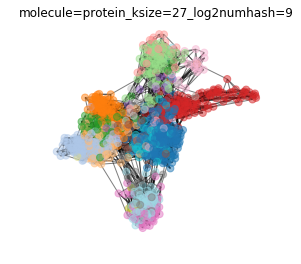

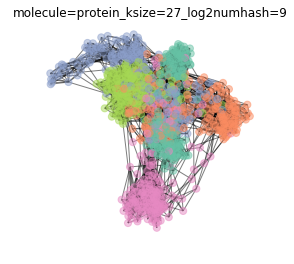

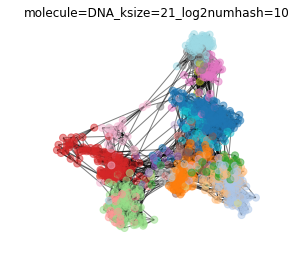

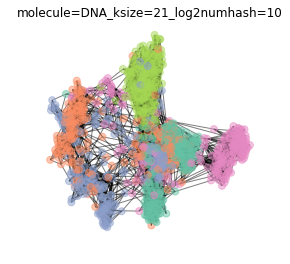

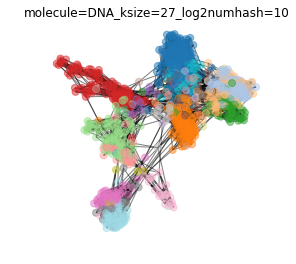

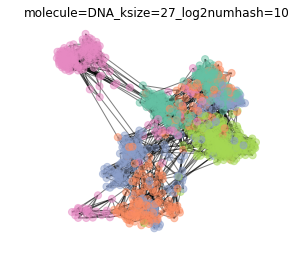

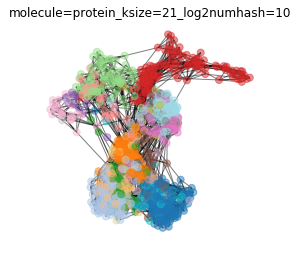

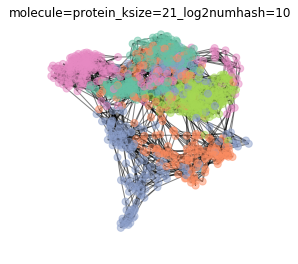

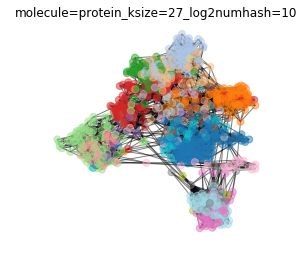

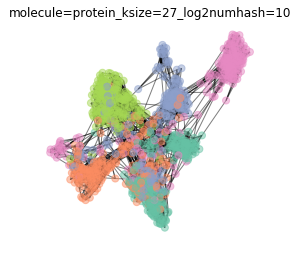

In [60]:

n_neighbors = 5

name_template = 'molecule={molecule}_ksize={ksize}_log2numhash={log2numhash}_nneighbors={n_neighbors}_labelcolor={label}'

pdf_template = f'{figure_folder}/bladder_kidney_spleen_' + name_template + '.pdf' 

palettes = dict(tissue='Set2', cell_ontology_class='tab20')
color_cols = ['cell_ontology_class', 'tissue']


with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    for name, da in ds.items():
        # Remove rows/columns that are all NA
        da = da.dropna('cell1', how='all').dropna('cell2', how='all')
        
        title = name
        index = da.cell1
        attributes = dict(re.findall(pattern, name))
        
        metadata = annotations.loc[index]
        
        data = pd.DataFrame(da.values, index=da.cell1, columns=da.cell2)

        graph = knn.nearest_neighbor_graph(data, metadata, n_neighbors=n_neighbors,
                                                       color_cols=color_cols, palettes=palettes)

        for label in color_cols:
            fig, ax = plt.subplots(figsize=(4, 4))
            
#             legend = label != 'cell_ontology_class'
            knn.draw_graph(graph, edge_color='black', label_col=label, legend=legend, node_size=50)
            ax.set(title=title)
            pdf = pdf_template.format(n_neighbors=n_neighbors, label=label, **attributes)
            fig.savefig(pdf)


In [44]:
ls /home/olga/code/kmer-hashing/figures/084_analyze_similarities_cell_subset/

ls: cannot access /home/olga/code/kmer-hashing/figures/084_analyze_similarities_cell_subset/: No such file or directory


In [49]:
da.dropna('cell1', how='all').dropna('cell2', how='all')

<xarray.DataArray 'molecule=DNA_ksize=27_log2numhash=8' (cell1: 974, cell2: 974)>
array([[0.      , 0.019531, 0.015625, ..., 0.015625, 0.03125 , 0.023438],
       [0.019531, 0.      , 0.078125, ..., 0.023438, 0.015625, 0.066406],
       [0.015625, 0.078125, 0.      , ..., 0.039062, 0.007812, 0.074219],
       ...,
       [0.015625, 0.023438, 0.039062, ..., 0.      , 0.015625, 0.015625],
       [0.03125 , 0.015625, 0.007812, ..., 0.015625, 0.      , 0.007812],
       [0.023438, 0.066406, 0.074219, ..., 0.015625, 0.007812, 0.      ]])
Coordinates:
  * cell1    (cell1) object 'A1-B002764-3_38_F-1-1' ... 'P9-MAA000487-3_10_M-1-1'
  * cell2    (cell2) object 'A1-B002764-3_38_F-1-1' ... 'P9-MAA000487-3_10_M-1-1'

In [47]:
data

cell2,A1-B002764-3_38_F-1-1,A1-D042253-3_9_M-1-1,A1-MAA000487-3_10_M-1-1,A1-MAA000779-3_11_M-1-1,A1-MAA100039-3_11_M-1-1,A10-B000971-3_39_F-1-1,A10-B002775-3_39_F-1-1,A10-D041914-3_8_M-1-1,A10-MAA000559-3_8_M-1-1,A11-D041914-3_8_M-1-1,...,P6-MAA000801-3_11_M-1-1,P6-MAA000907-3_11_M-1-1,P6-MAA000910-3_10_M-1-1,P7-B000971-3_39_F-1-1,P7-MAA000574-3_8_M-1-1,P7-MAA000776-3_10_M-1-1,P8-D041914-3_8_M-1-1,P8-MAA000907-3_11_M-1-1,P9-B001717-3_38_F-1-1,P9-MAA000487-3_10_M-1-1
cell1,,,,,,,,,,,,,,,,,,,,,
A1-B002764-3_38_F-1-1,0.000000,0.019531,0.015625,0.011719,0.011719,0.035156,0.023438,0.019531,NaN,0.027344,...,0.015625,0.023438,0.011719,0.015625,NaN,0.023438,0.015625,0.015625,0.031250,0.023438
A1-D042253-3_9_M-1-1,0.019531,0.000000,0.078125,0.031250,0.070312,0.031250,0.046875,0.105469,NaN,0.097656,...,0.058594,0.027344,0.011719,0.039062,NaN,0.039062,0.101562,0.023438,0.015625,0.066406
A1-MAA000487-3_10_M-1-1,0.015625,0.078125,0.000000,0.027344,0.050781,0.027344,0.035156,0.066406,NaN,0.074219,...,0.035156,0.027344,0.015625,0.023438,NaN,0.031250,0.101562,0.039062,0.007812,0.074219
A1-MAA000779-3_11_M-1-1,0.011719,0.031250,0.027344,0.000000,0.023438,0.023438,0.019531,0.027344,NaN,0.031250,...,0.015625,0.039062,0.023438,0.039062,NaN,0.035156,0.035156,0.019531,0.011719,0.015625
A1-MAA100039-3_11_M-1-1,0.011719,0.070312,0.050781,0.023438,0.000000,0.011719,0.031250,0.058594,NaN,0.046875,...,0.027344,0.027344,0.011719,0.019531,NaN,0.015625,0.066406,0.023438,0.011719,0.097656
A10-B000971-3_39_F-1-1,0.035156,0.031250,0.027344,0.023438,0.011719,0.000000,0.031250,0.039062,NaN,0.046875,...,0.019531,0.027344,0.011719,0.039062,NaN,0.054688,0.031250,0.015625,0.011719,0.031250
A10-B002775-3_39_F-1-1,0.023438,0.046875,0.035156,0.019531,0.031250,0.031250,0.000000,0.031250,NaN,0.039062,...,0.035156,0.031250,0.003906,0.035156,NaN,0.023438,0.039062,0.039062,0.019531,0.023438
A10-D041914-3_8_M-1-1,0.019531,0.105469,0.066406,0.027344,0.058594,0.039062,0.031250,0.000000,NaN,0.132812,...,0.035156,0.039062,0.019531,0.035156,NaN,0.042969,0.089844,0.050781,0.027344,0.089844
A10-MAA000559-3_8_M-1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
